In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

# Allow several prints in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
file = '/kaggle/input/netflix-shows/netflix_titles.csv'
df = pd.read_csv(file)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
df.shape
# df.date_added.dtype
df.describe()

(6234, 12)

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [4]:
t = '''show_id:Unique ID for every Movie / Tv Show
type:Identifier - A Movie or TV Show
title:Title of the Movie / Tv Show
director:Director of the Movie
cast:Actors involved in the movie / show
country:Country where the movie / show was produced
date_added:Date it was added on Netflix
release_year:Actual Release year of the move / show
rating:TV Rating of the movie / show
duration:Total Duration - in minutes or number of seasons
listed_in:Genere
description:The summary description'''
cols = [r.split(':')[0] for r in t.split('\n')]
des = [r.split(':')[1] for r in t.split('\n')]

data_info = pd.DataFrame({'column_name': cols, 'description': des})
data_info

,column_name,description
0,show_id,Unique ID for every Movie / Tv Show
1,type,Identifier - A Movie or TV Show
2,title,Title of the Movie / Tv Show
3,director,Director of the Movie
4,cast,Actors involved in the movie / show
5,country,Country where the movie / show was produced
6,date_added,Date it was added on Netflix
7,release_year,Actual Release year of the move / show
8,rating,TV Rating of the movie / show
9,duration,Total Duration - in minutes or number of seasons


In [5]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
# df['add_year'] = df['date_added'].fillna('Null').apply(lambda x: 2020 if x == 'Null' else int(x.split(', ')[-1]))

df['seaons'] = df.apply(lambda x: int(x.duration.split()[0]) if "Season" in x.duration else np.nan, axis=1)
df['length'] = df.apply(lambda x: np.nan if "Season" in x.duration else int(x.duration.split()[0]), axis=1)
df[df['year_added'] == 2020].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,seaons,length
3180,81214114,Movie,Bulletproof 2,Don Michael Paul,"Faizon Love, Kirk Fox, Tony Todd, Pearl Thusi,...",United States,2020-01-09,2020,TV-MA,97 min,"Action & Adventure, Comedies",A special agent abruptly reunites with a crimi...,2020.0,1.0,NaN,97.0
3181,81167492,Movie,Speed Is My Need,Mark Sloper,NaN,United Kingdom,2020-01-09,2019,TV-14,75 min,"Documentaries, Sports Movies",This daredevil documentary trails behind and i...,2020.0,1.0,NaN,75.0
3189,81039393,TV Show,Cheer,NaN,NaN,United States,2020-01-08,2020,TV-MA,1 Season,"Docuseries, Reality TV, Teen TV Shows",This gripping docuseries follows the ups and d...,2020.0,1.0,1.0,NaN
3194,80173542,Movie,A Ghost Story,David Lowery,"Casey Affleck, Rooney Mara, Liz Franke, Rob Za...",United States,2020-01-07,2017,R,92 min,"Dramas, Independent Movies","Following a fatal car crash, a man's spirit re...",2020.0,1.0,NaN,92.0
3195,80233408,Movie,"Live Twice, Love Once",Maria Ripoll,"Oscar Martínez, Inma Cuesta, Mafalda Carbonell...",Spain,2020-01-07,2020,TV-MA,102 min,"Comedies, Dramas, International Movies",When Emilio (Oscar Martínez) is diagnosed with...,2020.0,1.0,NaN,102.0


In [6]:
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']
print("there are: \n{} movies and \n{} TV shows in the \n{} records".format(movies.show_id.count().sum(), tv_shows.shape[0], len(df)))

there are: 
4265 movies and 
1969 TV shows in the 
6234 records


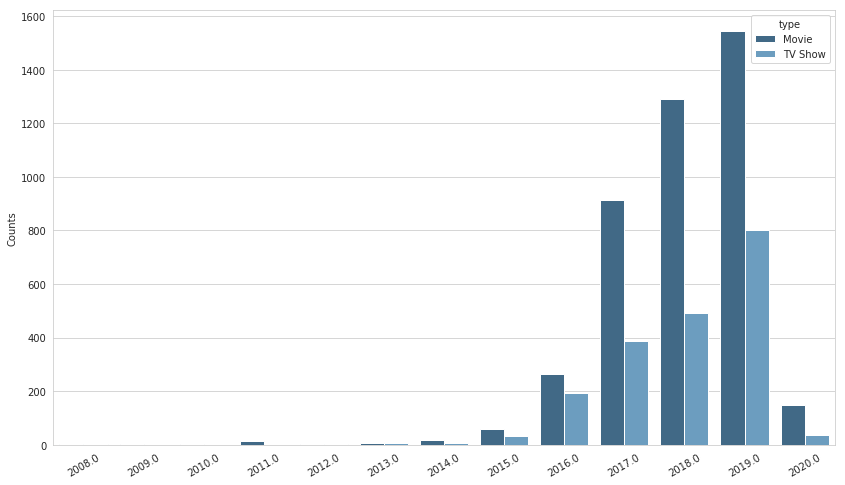

In [7]:
per_year = df.groupby(['year_added', 'type'])['show_id'].count().reset_index() #unstack().unstack()

f,a = plt.subplots(1,1,figsize=(14,8))
g = sns.barplot(x='year_added',
            y='show_id',
            hue='type',
            data=per_year,
            palette='Blues_d',
            ax = a
            )
a.set_ylabel('Counts')
a.set_xlabel('')
plt.xticks(rotation='30');

In [8]:
m_directors, tv_directors = [], []
for c in movies.director.fillna(""):
    m_directors.extend([ci.strip() for ci in c.split(',')])
for c in tv_shows.director.fillna(""):
    tv_directors.extend([ci.strip() for ci in c.split(',')])    
m_directors = pd.Series(m_directors)
# m_casts = m_casts[m_casts != ""]
tv_directors = pd.Series(tv_directors)
m_directors.value_counts().head()
tv_directors.value_counts().head()

                128
Jan Suter        21
Raúl Campos      19
Marcus Raboy     14
Jay Karas        14
dtype: int64

                       1841
Ken Burns                 3
Alastair Fothergill       3
Shin Won-ho               2
Rob Seidenglanz           2
dtype: int64

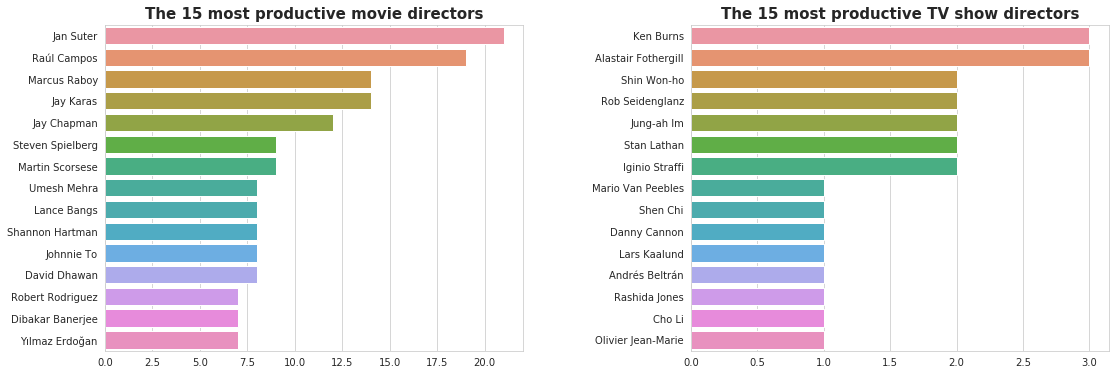

In [9]:
f,a = plt.subplots(1,2,figsize=(18,6))
f.subplots_adjust(wspace = .4)
sns.barplot(m_directors.value_counts()[1:16], m_directors.value_counts()[1:16].index, ax=a[0])
a[0].set_title('The 15 most productive movie directors', fontsize=15, fontweight='bold')
a[0].set_xlabel('')
sns.barplot(tv_directors.value_counts()[1:16], tv_directors.value_counts()[1:16].index, ax=a[1])
a[1].set_title('The 15 most productive TV show directors', fontsize=15, fontweight='bold')
a[1].set_xlabel('');

In [10]:
m_casts, tv_casts = [], []
for c in movies.cast.fillna(""):
    m_casts.extend([ci.strip() for ci in c.split(',')])
for c in tv_shows.cast.fillna(""):
    tv_casts.extend([ci.strip() for ci in c.split(',')])    
m_casts = pd.Series(m_casts)
# m_casts = m_casts[m_casts != ""]
tv_casts = pd.Series(tv_casts)
m_casts.value_counts().head()
tv_casts.value_counts().head()

                    360
Anupam Kher          32
Shah Rukh Khan       30
Om Puri              27
Naseeruddin Shah     27
dtype: int64

                      210
Takahiro Sakurai       18
Yuki Kaji              16
Daisuke Ono            14
David Attenborough     14
dtype: int64

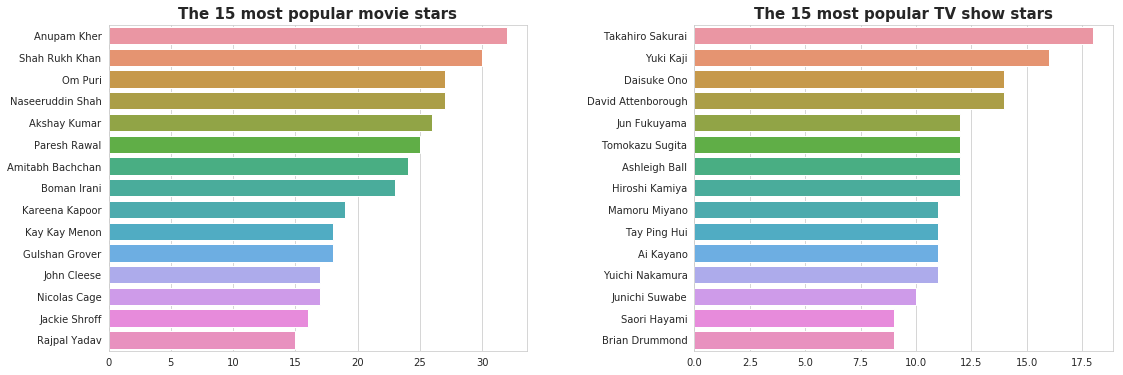

In [11]:
f,a = plt.subplots(1,2,figsize=(18,6))
f.subplots_adjust(wspace = .4)
sns.barplot(m_casts.value_counts()[1:16], m_casts.value_counts()[1:16].index, ax=a[0])
a[0].set_title('The 15 most popular movie stars', fontsize=15, fontweight='bold')
a[0].set_xlabel('')
sns.barplot(tv_casts.value_counts()[1:16], tv_casts.value_counts()[1:16].index, ax=a[1])
a[1].set_title('The 15 most popular TV show stars', fontsize=15, fontweight='bold')
a[1].set_xlabel('');

In [12]:
people = set(m_directors.value_counts()[1:16].index.tolist() +
             tv_directors.value_counts()[1:16].index.tolist() + 
             m_casts.value_counts()[1:16].index.tolist() + 
             tv_casts.value_counts()[1:16].index.tolist()
            )
print(people)

{'Raúl Campos', 'Shannon Hartman', 'Rajpal Yadav', 'Robert Rodriguez', 'Yılmaz Erdoğan', 'Ashleigh Ball', 'Stan Lathan', 'Alastair Fothergill', 'Paresh Rawal', 'David Dhawan', 'Jay Karas', 'Anupam Kher', 'Takahiro Sakurai', 'Yuki Kaji', 'Umesh Mehra', 'Shah Rukh Khan', 'Saori Hayami', 'Jan Suter', 'Daisuke Ono', 'Martin Scorsese', 'Tomokazu Sugita', 'Ken Burns', 'Gulshan Grover', 'Hiroshi Kamiya', 'Tay Ping Hui', 'Brian Drummond', 'Boman Irani', 'Lance Bangs', 'Akshay Kumar', 'Jung-ah Im', 'John Cleese', 'Jackie Shroff', 'Lars Kaalund', 'Mario Van Peebles', 'Rashida Jones', 'Yuichi Nakamura', 'Olivier Jean-Marie', 'David Attenborough', 'Dibakar Banerjee', 'Jun Fukuyama', 'Kareena Kapoor', 'Cho Li', 'Kay Kay Menon', 'Shin Won-ho', 'Andrés Beltrán', 'Steven Spielberg', 'Amitabh Bachchan', 'Nicolas Cage', 'Mamoru Miyano', 'Jay Chapman', 'Shen Chi', 'Rob Seidenglanz', 'Danny Cannon', 'Om Puri', 'Ai Kayano', 'Iginio Straffi', 'Naseeruddin Shah', 'Marcus Raboy', 'Junichi Suwabe', 'Johnnie To

In [13]:
networks,works = {}, {}

for i,r in df.fillna('').iterrows():
    group = [p.strip() for p in r['director'].split(',') if p != '']
    group.extend([p.strip() for p in r['cast'].split(',') if p != ''])
#     print(group)
    for p in group:
        if len(p) != 0 and p in people:
            c = networks.get(p, set())
            networks[p] = c.union(set(group))
            works[p] = works.get(p, 0) + 1
        
#     break
for p in networks:
    networks[p] = len(networks.get(p)) - 1
# pd.concat([pd.Series(networks), pd.Series(works)], axis = 1)
network_vs_work = pd.DataFrame({'network_size':pd.Series(networks), 'works':pd.Series(works)})

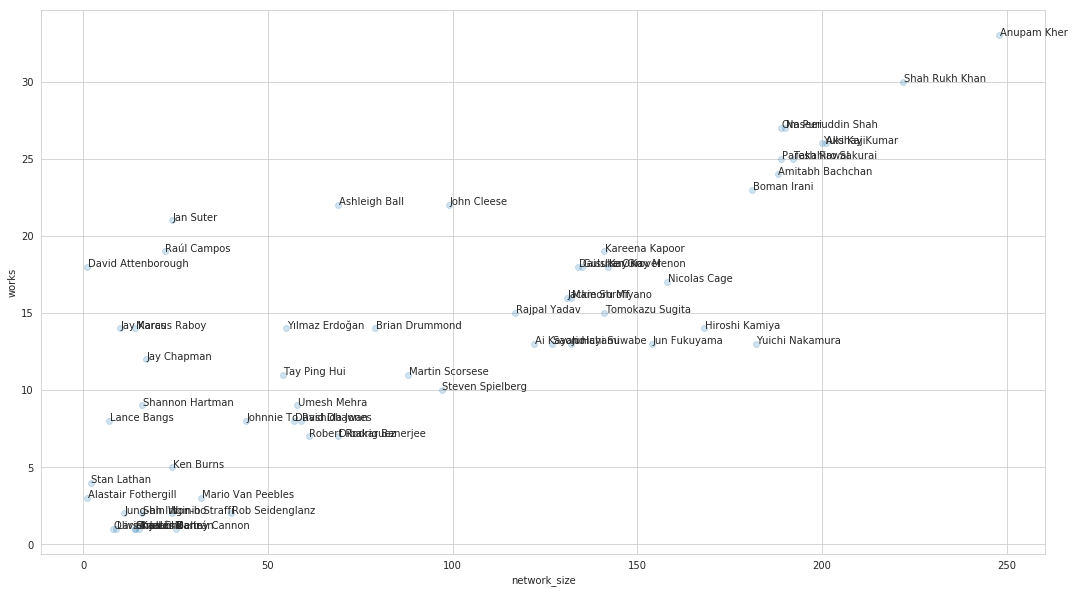

In [14]:
ax = sns.regplot(x='network_size', y='works', data=network_vs_work, 
           fit_reg=False,y_jitter=0, scatter_kws={'alpha':0.2});
#            size = 6, aspect =2);
for i, r in network_vs_work.iterrows():
    ax.text(r.network_size+0.2, r.works, i)
ax.figure.set_size_inches(18, 10);

In [15]:
network_vs_work = network_vs_work.reset_index().rename(columns={'index': 'person'})

In [16]:
network_vs_work['movie_or_tv'] = network_vs_work.apply(lambda x: 'Movie' if x['person'] in set(m_directors.value_counts()[1:16].index.tolist() + 
              m_casts.value_counts()[1:16].index.tolist()) else 'TV', axis=1)
network_vs_work.sample(6)

,person,network_size,works,movie_or_tv
17,Stan Lathan,2,4,TV
16,Jay Chapman,17,12,Movie
10,Gulshan Grover,135,18,Movie
4,Yuki Kaji,200,26,TV
20,Shah Rukh Khan,222,30,Movie
59,Jung-ah Im,11,2,TV


In [17]:
network_vs_work['dir_or_star'] = network_vs_work.apply(lambda x: 'Director' if x['person'] in set(m_directors.value_counts()[1:16].index.tolist() + 
              tv_directors.value_counts()[1:16].index.tolist()) else 'Star', axis=1)
network_vs_work.sample(6)

,person,network_size,works,movie_or_tv,dir_or_star
51,Andrés Beltrán,15,1,TV,Director
19,Ai Kayano,122,13,TV,Star
43,Raúl Campos,22,19,Movie,Director
23,John Cleese,99,22,Movie,Star
30,David Attenborough,1,18,TV,Star
25,Tay Ping Hui,54,11,TV,Star


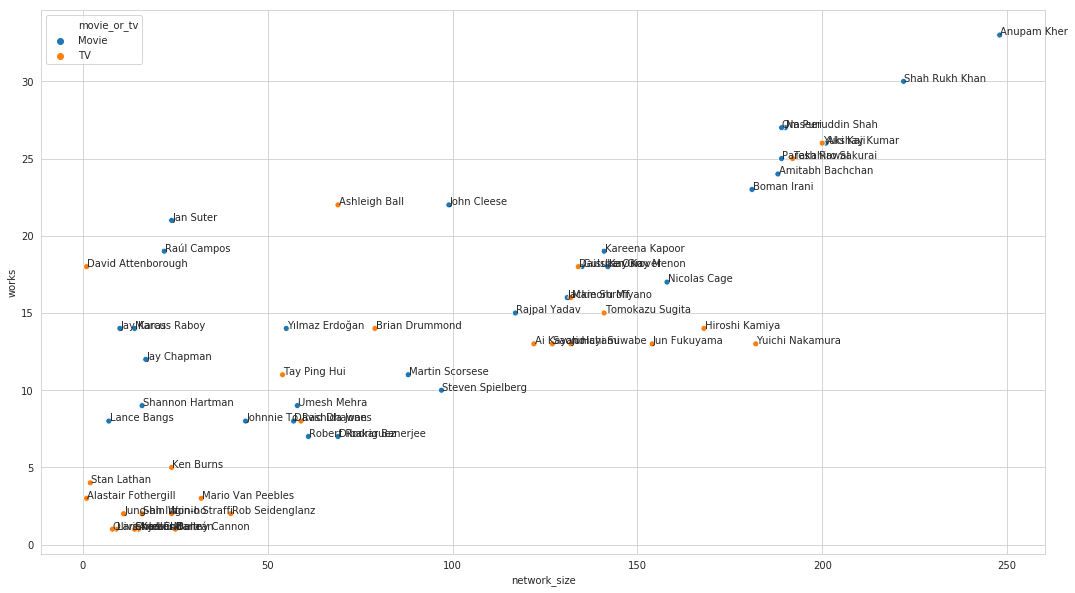

In [18]:
ax = sns.scatterplot(x='network_size', y='works', hue='movie_or_tv', data=network_vs_work);
#            size = 6, aspect =2);
for i, r in network_vs_work.iterrows():
    ax.text(r.network_size+0.2, r.works, r.person)
ax.figure.set_size_inches(18, 10);

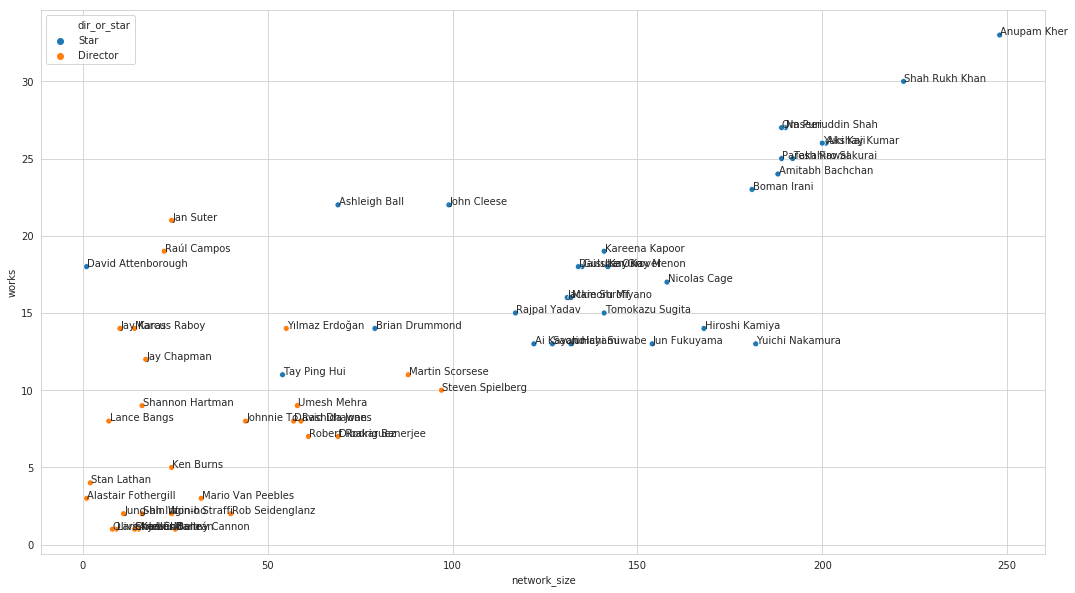

In [19]:
ax = sns.scatterplot(x='network_size', y='works', hue='dir_or_star', data=network_vs_work);
#            size = 6, aspect =2);
for i, r in network_vs_work.iterrows():
    ax.text(r.network_size+0.2, r.works, r.person)
ax.figure.set_size_inches(18, 10);

In [20]:
df[df['cast'].fillna('').str.contains('David Attenborough')].sort_values(by='year_added')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,seaons,length
774,70245168,TV Show,Nature's Great Events (2009),NaN,David Attenborough,"United States, United Kingdom",2015-10-10,2009,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",This series looks at how seasonal changes caus...,2015.0,10.0,1.0,NaN
5328,70266023,TV Show,Life on Location,NaN,David Attenborough,United States,2015-04-22,2009,TV-G,1 Season,"British TV Shows, Docuseries, Science & Nature TV","Members of the BBC's ""Life"" production crew go...",2015.0,4.0,1.0,NaN
5327,70225722,TV Show,Life,NaN,David Attenborough,"United Kingdom, United States, Greece, Italy, ...",2015-04-22,2009,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",Discover the glorious variety of life on Earth...,2015.0,4.0,1.0,NaN
5329,80045629,TV Show,Nature's Great Events: Diaries,NaN,David Attenborough,"United States, United Kingdom",2015-04-22,2009,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",Look behind the scenes of this wildlife docume...,2015.0,4.0,1.0,NaN
5330,70219642,TV Show,Planet Earth: The Complete Collection,Alastair Fothergill,David Attenborough,United Kingdom,2015-04-22,2006,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",This landmark series transports nature lovers ...,2015.0,4.0,1.0,NaN
775,70235731,TV Show,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,David Attenborough,United Kingdom,2015-10-10,2001,TV-G,1 Season,"British TV Shows, Docuseries, International TV...",David Attenborough narrates this definitive ex...,2015.0,10.0,1.0,NaN
3272,70261978,TV Show,Frozen Planet,Alastair Fothergill,David Attenborough,"United Kingdom, United States, Spain, Germany,...",2016-01-28,2011,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",Go on a journey through the Arctic and Antarct...,2016.0,1.0,1.0,NaN
3273,70279637,Movie,Frozen Planet: On Thin Ice,NaN,David Attenborough,"United Kingdom, United States, Spain, Germany,...",2016-01-28,2011,TV-PG,47 min,Movies,David Attenborough journeys to both polar regi...,2016.0,1.0,NaN,47.0
3274,80049171,Movie,Frozen Planet: The Epic Journey,NaN,David Attenborough,"United Kingdom, United States, Spain, Germany,...",2016-01-28,2011,TV-PG,52 min,Movies,Collecting highlights from the epic documentar...,2016.0,1.0,NaN,52.0
5269,70298341,TV Show,Africa,NaN,David Attenborough,United Kingdom,2016-04-28,2013,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",This five-part nature series chronicles fascin...,2016.0,4.0,1.0,NaN


Looks like David Attenborough is a scientific documentory specialist. It is possible that he has a great network but those people are not recognized in the typical show business.

In [21]:
movies.country.nunique()
movies.country.value_counts().sum()
movies.country.value_counts()[:20].sum()
movies.country.value_counts()[:20].sum() / movies.country.value_counts().sum() * 100

movies.country.value_counts().head(20)

482

4070

3168

77.83783783783784

United States                    1482
India                             724
United Kingdom                    170
Canada                             88
Spain                              80
Turkey                             55
Mexico                             54
France                             50
Hong Kong                          49
Japan                              47
Philippines                        43
Indonesia                          43
Egypt                              42
United Kingdom, United States      40
Nigeria                            36
Brazil                             35
Germany                            33
Thailand                           33
South Korea                        32
Australia                          32
Name: country, dtype: int64

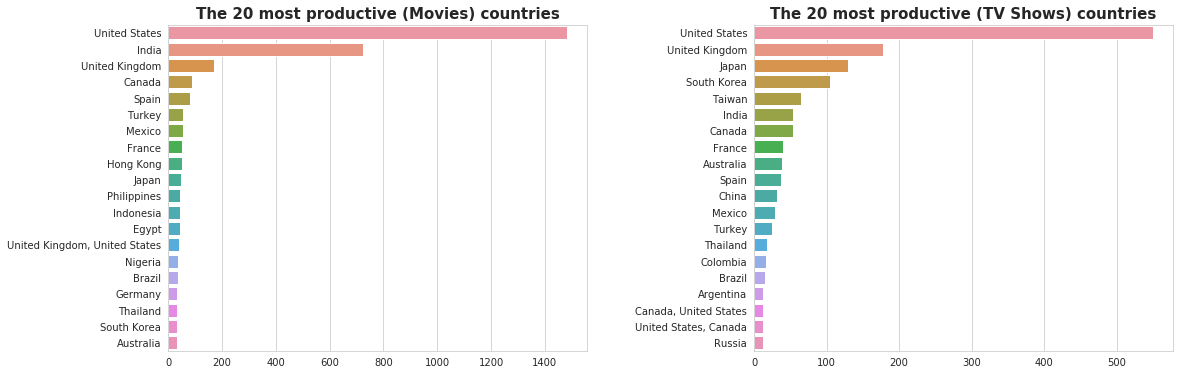

In [22]:
f,a = plt.subplots(1,2,figsize=(18,6))
f.subplots_adjust(wspace = .4)
sns.barplot(movies.country.value_counts().head(20), movies.country.value_counts().head(20).index, ax=a[0])
a[0].set_title('The 20 most productive (Movies) countries', fontsize=15, fontweight='bold')
a[0].set_xlabel('')
sns.barplot(tv_shows.country.value_counts().head(20), tv_shows.country.value_counts().head(20).index, ax=a[1])
a[1].set_title('The 20 most productive (TV Shows) countries', fontsize=15, fontweight='bold')
a[1].set_xlabel('');

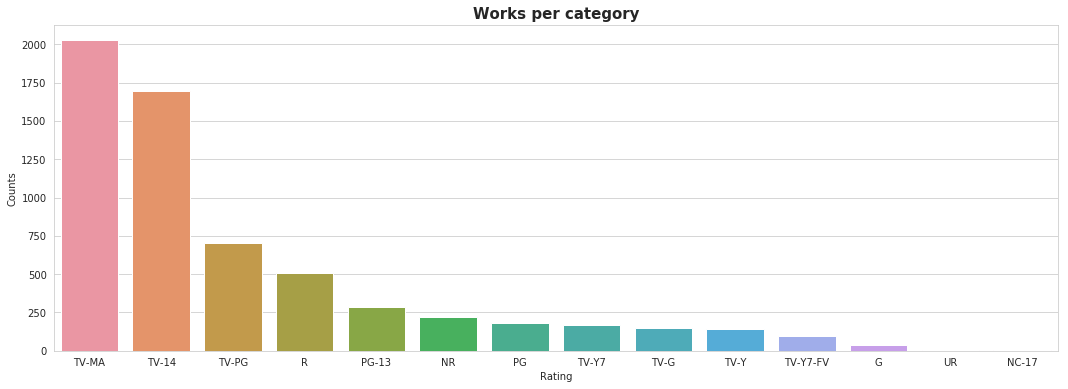

In [23]:
f,a = plt.subplots(1,1,figsize=(18,6))
# f.subplots_adjust(wspace = .4)
sns.barplot(df.rating.value_counts().index, df.rating.value_counts(), ax=a)
a.set_title('Works per category', fontsize=15, fontweight='bold')
a.set_ylabel('Counts')
a.set_xlabel('Rating');

**************
From other kernels

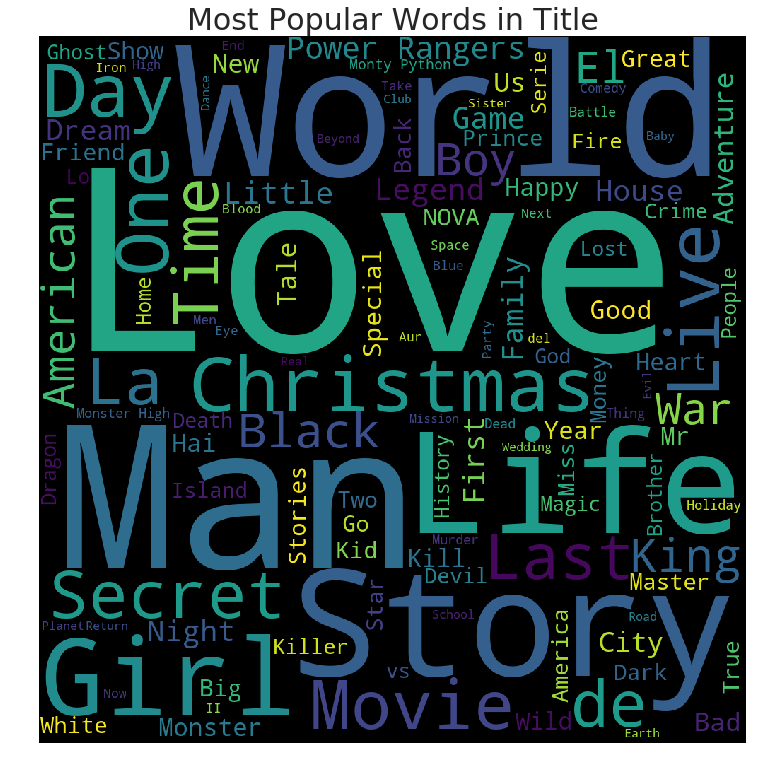

In [24]:
# source: https://www.kaggle.com/vikassingh1996/netflix-movies-and-shows-plotly-recommender-sys
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.show();

In [25]:
'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

def pie_plot(cnt_srs, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=plt.cm.viridis_r(np.linspace(0, 1, 14)),
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

py.iplot([pie_plot(df['rating'].value_counts(), 'Content Type')]);

In [26]:
# source: https://www.kaggle.com/subinium/storytelling-with-data-netflix-ver

import plotly.express as px
year_country2 = df.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country2, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Comparison by country')
fig.show();